### Deep Reinforcement Learning for play Atari 2600 game
### INF 2064 - MODVIS
#### Pedro Torres - 1912720

### Installing dependencies

To run this notebook some dependecies are required, i prepared a `.txt` file to facilitate the job of configure environment. For this, just run the following commands:

* `pip3 install -r requirements.txt`
* `pip3 install gym[atari]`

### Problem: SpaceInvaders

Maximize your score in the Atari 2600 game SpaceInvaders. In this environment, the observation is an RGB image of the screen, which is an array of shape (210, 160, 3) Each action is repeatedly performed for a duration of k frames, where k is uniformly sampled from {2, 3, 4}.

In the rest of this notebook, each class implemented will be briefly explained, and if you have some doubts, you can look directly at the files. All the code is fully documented.

### Replay buffer

Replay buffer stores the past experience from the agent. The class implemented have two principal functions:

* `add(s, a, r, d, s')`: add a new experience to memory
* `sample(batch_size)`: return samples of experiences

In [1]:
import warnings
import replay_buffer

warnings.filterwarnings('ignore')

### Model

The implementation used here is based on the implementation that was used in the DeepMind paper. The model use a sequence convolutional (2d) layers and fully connected layers. For activation, Rectified Linear Unit (relu) is used and for the loss function, Mean Squared Error (MSE) is used. The learning rate choosen was 0.00001

The class implemented have the following functions as principal functions:
* `construct_q_network()`: build a Q-network with the description mentioned above
* `train(s_batch, a_batch, r_batch, d_batch, s'_batch)`: Train main Q-network in batchs and use target Q-network to evaluate and update Q-value. The Q-value is calculated using the following equation:
<img src="q-value.png" width=650>
* `target_train()`: Copy weights from main Q-network to target Q-network with a slightly change using parameter $T$ and the following equation: $T * \theta_{main} + (1 - T) * \theta_{target}$
* `predict_movement(data, epsilon)`: Use Q-network to predict a movement passing raw data of image and $\epsilon$, where $\epsilon$ is the probability of perform a random action

In [2]:
import model

Using TensorFlow backend.


### Space invaders

Interface implemented to provide interaction between agent (Q-network) and environment of the [OpenAI Gym](https://gym.openai.com/). The principal functions for this class are:

* `train(num_frames)`: This function performs all steps to train the Q-network, during execution some logs are according to the number of observations that passed to provide a report of the progress. In the process of training the Q-network is retrained after the end of each game

* `simulate(ngames, usefps, fps)`: Simulate games using a pretrained model. In this function is possible to specify the number of games that you want the model plays. The parameter `usefps` can be used to define frames per second

In [3]:
import space_invaders

### Config

File used to define a series of parameters, such as: size of buffer, total of frames used during training, learning rate, etc.

In [4]:
import config

### How to execute

Train Q-network: `python main.py -m train`

Simulate games: `python main.py -m test -l ddqn.h5 -n 10`

Args: 
* `-m`: mode (train, test)
* `-l`: .h5 file with pretrained model
* `-n`: numbers of games to simulate
* `-f`: use fps limite (60 default)

### Calling main.py file and simulating games

In [15]:
!python3 main.py -m test -l ddqn.h5 -n 10

Using TensorFlow backend.
/home/torres/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/torres/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/torres/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/torres/.local/lib/python3.6/site-packages/tensorflow/python

### Report of results

It's possible to see there are a lot of peaks and valleys during training, also, it's hard to say that the agent had good learning. Maybe a change of the hyperparameters gives better results.

P.S: Each epoch corresponds a one game played by the agent.

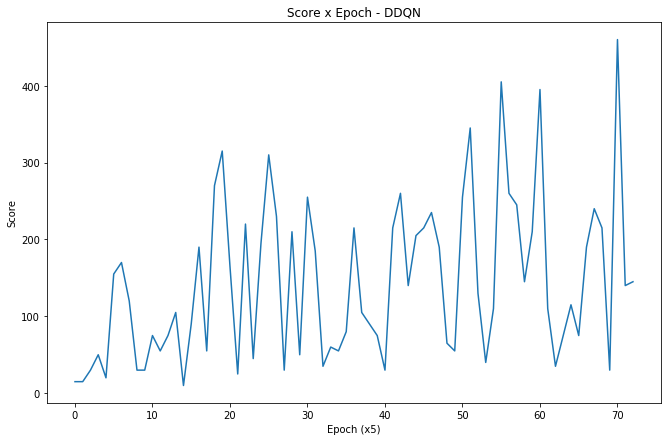

In [18]:
import pickle
import matplotlib.pyplot as plt

with open('rewards.pkl', 'rb') as f:
    rewards = pickle.load(f)

plt.figure(figsize=(11,7))
plt.plot([r[0] for r in rewards[::5]])
plt.xlabel('Epoch (x5)')
plt.ylabel('Score')
plt.title('Score x Epoch - DDQN')
plt.show()

### Conclusions

Deep Q-learning is a powerful technique believed by many researchers as the most promising lead towards artificial intelligence. RL is able to solve many toy problems, but the Q-table is unable to scale to more complex real-world problems. The solution is to learn the Q-table using a deep neural network. However, training deep neural networks on RL is highly unstable due to sample correlation. So although the algorithm sounds great at first sight still has some open problems to be solved.

### References

* [DeepMind Paper](https://deepmind.com/research/publications/human-level-control-through-deep-reinforcement-learning)
* [Deep Reinforcement Learning to play Space Invaders](https://nihit.github.io/resources/spaceinvaders.pdf)
* [How to teach AI to play Games: Deep Reinforcement Learning](https://towardsdatascience.com/how-to-teach-an-ai-to-play-games-deep-reinforcement-learning-28f9b920440a)